<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/SVM_classic_qc_Ana_Alonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio "binary-classification" para saber si una persona realizará o no un fraude a un banco clase 0 No comete fraude y clase 1 comete fraude.

Importación e instalación de librerías a usar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install qiskit
!pip install qiskit-machine-learning
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512379 sha256=4d819d81a17c513168ccfaa356b002af02768d4d1cf03f51add15e5b3dc64358
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448da

Descarga del dataset 'creditcard' y estudio de las variables.

In [15]:
del df_original

In [17]:
df_original = pd.read_csv("creditcard.csv", encoding='latin-1', sep=',', error_bad_lines=False)

df_original

<ipython-input-17-2175b10118b4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_original = pd.read_csv("creditcard.csv", encoding='latin-1', sep=',', error_bad_lines=False)
Skipping line 2924: expected 31 fields, saw 42
Skipping line 14583: expected 31 fields, saw 51
Skipping line 26229: expected 31 fields, saw 55

Skipping line 37872: expected 31 fields, saw 37
Skipping line 43689: expected 31 fields, saw 44
Skipping line 46598: expected 31 fields, saw 40
Skipping line 49510: expected 31 fields, saw 46
Skipping line 55328: expected 31 fields, saw 37
Skipping line 61146: expected 31 fields, saw 37

Skipping line 66964: expected 31 fields, saw 45
Skipping line 72780: expected 31 fields, saw 38
Skipping line 75688: expected 31 fields, saw 40
Skipping line 78598: expected 31 fields, saw 34
Skipping line 87324: expected 31 fields, saw 43
Skipping line 90232: expected 31 fields, saw 46

Skippi

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.37978,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685231,124454.0,1.567133,-1.922269,-0.861657,-0.699402,-1.229563,-0.229944,-0.652909,-0.177888,-0.070834,...,0.588412,1.043438,-0.135688,0.744593,-0.248249,-0.132289,-0.041897,0.018858,328.95,0.0
685232,124454.0,1.693596,-0.453058,-2.125213,0.043761,1.114435,1.300389,-0.145541,0.393954,0.724469,...,-0.082415,-0.142651,0.148169,-0.918940,-0.267087,-0.024507,0.020308,-0.022834,109.55,0.0
685233,124455.0,2.353181,-1.421553,-1.444276,-1.886074,-0.695216,-0.009103,-1.143704,-0.054105,-1.330139,...,-0.212344,-0.131079,0.053856,-1.415529,-0.031580,-0.093945,0.000268,-0.076366,15.00,0.0
685234,124455.0,-0.706706,0.706397,0.266097,-1.398711,2.15007,1.643452,1.868407,-0.755867,0.958281,...,-0.350858,0.232533,-0.052667,-0.711978,-1.062567,0.054009,-0.562344,-0.681474,48.82,0.0


In [30]:
df_nona = df_original.dropna()
df_nona.shape

(685117, 31)

In [41]:
df_nona.groupby("class").count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
class,,,,,,,,,,,,,,,,,,,,,
0.0,683897,683897,683897,683897,683897,683897,683897,683897,683897,683897,...,683897,683897,683897,683897,683897,683897,683897,683897,683897,683897
1.0,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,...,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220


Observamos que hay muchos más registros de clase cero que de clase 1, por lo que modificaremos el dataset a usar, tomando todos los registros de clase 1 y solo 1800 de clase 0.

Mezclamos los registros para que no aparezcan las clases que son iguales todas seguidas.

In [46]:
df_class1 = df_nona.loc[df_nona["class"] == 1.0]
df_class0 = df_nona.loc[df_nona["class"] == 0.0]
df_class0 = df_class0[0:1800]
df = pd.concat([df_class1, df_class0], axis=0)

df = df.sample(frac=1).reset_index(drop=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,55618.0,-7.427924,2.948209,-8.678550,5.185303,-4.76109,-0.957095,-7.773380,0.717309,-3.682359,...,-0.299847,0.610479,0.789023,-0.564512,0.201196,-0.111225,1.144599,0.102280,130.44,1.0
1,760.0,1.047174,0.287738,0.364303,2.233527,0.157587,0.284012,0.105707,0.081059,-0.940673,...,-0.204318,-0.881569,-0.038847,-0.553368,0.297419,-0.240085,-0.026894,0.023765,82.39,0.0
2,91524.0,1.954851738,1.630056,-4.337200,2.378367,2.113348,-1.583851,0.653745,-0.192892,1.217608,...,-0.474437,-0.974625,-0.048155,-0.023524,0.362192,-0.570709,0.025619,0.081880,1.00,1.0
3,1117.0,-1.380039,-0.130959,0.125171,-2.168485,0.548425,-1.724708,0.032269,0.372233,0.313251,...,0.191337,0.248717,-0.204741,0.054709,-0.072070,-0.138376,0.246529,-0.023616,1.00,0.0
4,1055.0,-0.130059,0.902067,1.027702,0.319855,0.354716,-0.416394,0.536939,-0.030385,-0.461501,...,-0.279110,-0.873096,-0.104909,-0.523470,-0.071964,0.231711,-0.017217,0.001954,9.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1382.0,1.23252,-0.576553,0.650583,-1.758986,-1.345216,-1.279384,-0.381416,-0.220661,2.296596,...,0.154317,0.847685,-0.193195,0.820844,0.805782,-0.623073,0.100747,0.034021,22.74,0.0
3016,41147.0,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,...,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,88.23,1.0
3017,742.0,1.304437,-0.709851,-0.112405,-2.207912,-0.355304,0.170636,-0.518525,0.050055,2.470382,...,0.065871,0.610271,-0.375163,-1.229720,0.948828,-0.485356,0.111789,0.012819,25.95,0.0
3018,614.0,1.39542,-0.269139,-0.071822,-0.247354,-0.554784,-0.902046,-0.071149,-0.257163,-1.082810,...,-0.813067,-1.975568,0.196534,-0.194207,0.152455,0.122878,-0.041238,0.012794,21.50,0.0


Saco la matriz de correlación para estudiar qué variables explican mejor la clase binaria para quedarme solo con esas columnas.

<ipython-input-47-7274ee0578a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mtx = df.corr()


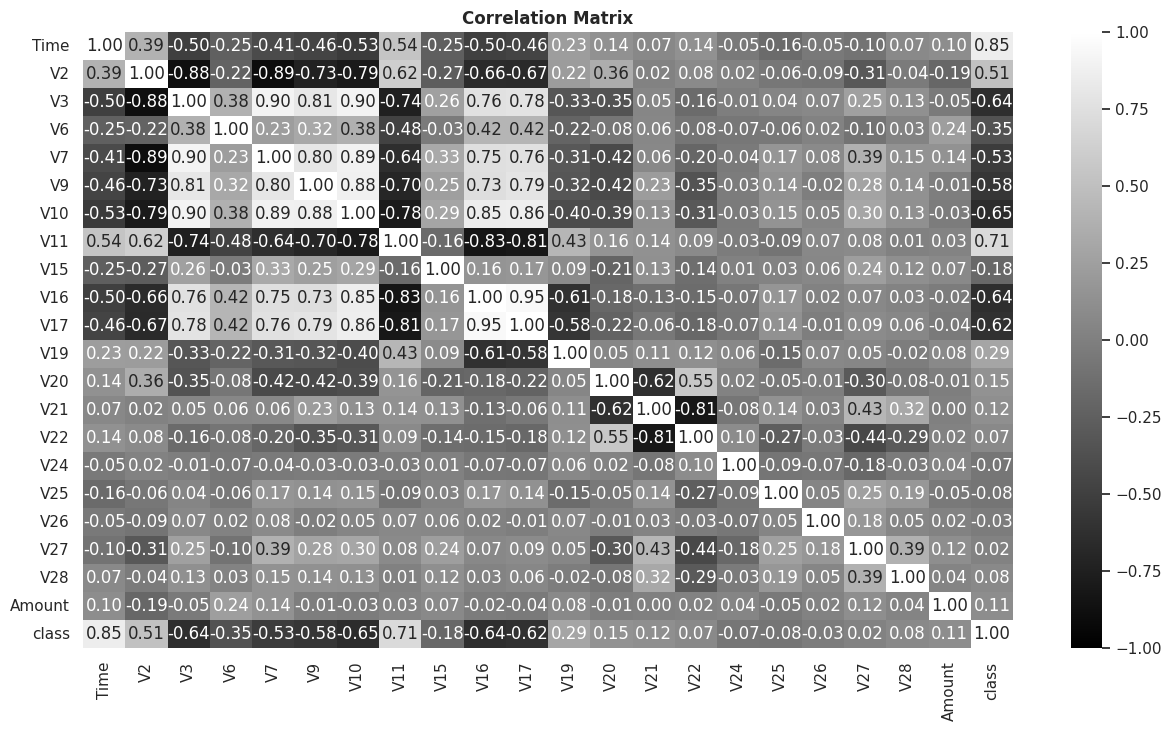

In [47]:
cor_mtx = df.corr()
df_corr = pd.DataFrame(cor_mtx)
fig, ax = plt.subplots(figsize=(15, 8))
sbn.set(style="white", palette="gray")
sbn.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='gray', fmt=".2f");
ax.set_title('Correlation Matrix', weight='bold')
plt.show()

Observamos que las más correlacionadas son Time, V2, V3, V6, V7, V9, V10, V11, V16 y V17.

A continuación, elimino el resto de columnas.

In [61]:
df_to_use = df.drop(columns=['V1','V4','V5','V8','V12','V13','V14','V15','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])

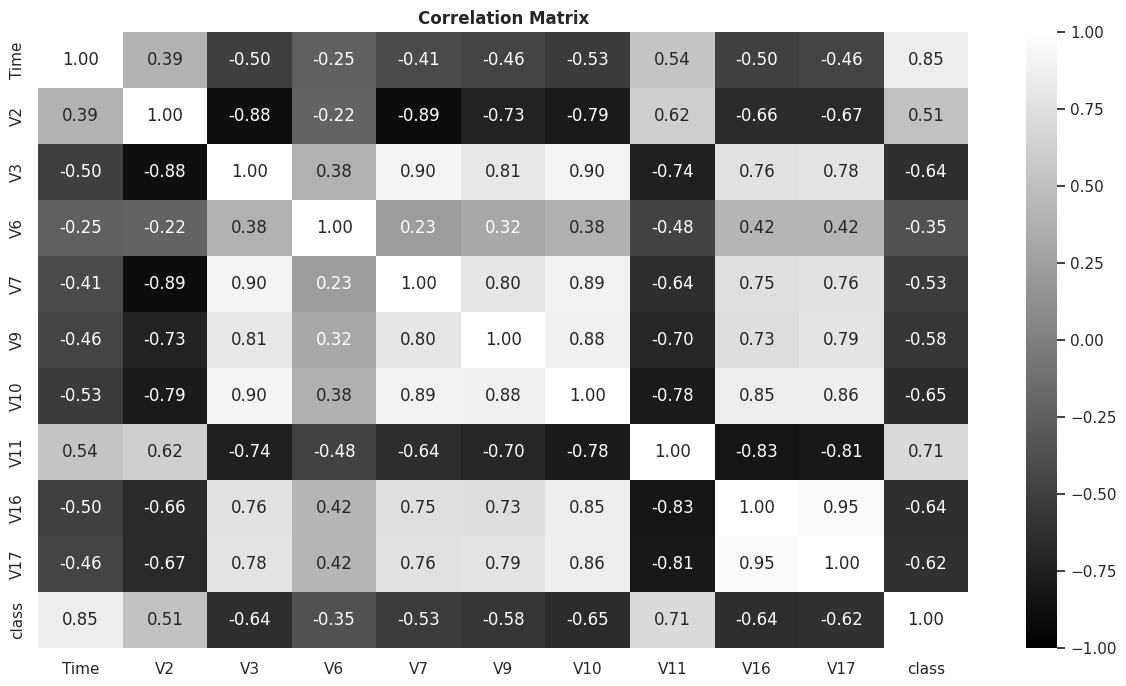

In [62]:
cor_mtx = df_to_use.corr()
df_corr = pd.DataFrame(cor_mtx)
fig, ax = plt.subplots(figsize=(15, 8))
sbn.set(style="white", palette="gray")
sbn.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='gray', fmt=".2f");
ax.set_title('Correlation Matrix', weight='bold')
plt.show()

In [63]:
df_to_use.groupby("class").count()

,Time,V2,V3,V6,V7,V9,V10,V11,V16,V17
class,,,,,,,,,,
0.0,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800
1.0,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220


Ahora sí, tenemos un dataset de 3200 registros más o menos equilibrados. Y solo con las variables más explicativas.

Saco un diagrama de barras para ver la correlación de las variables escogidas frente a la variable objetivo, la clase.

<function matplotlib.pyplot.show(close=None, block=None)>

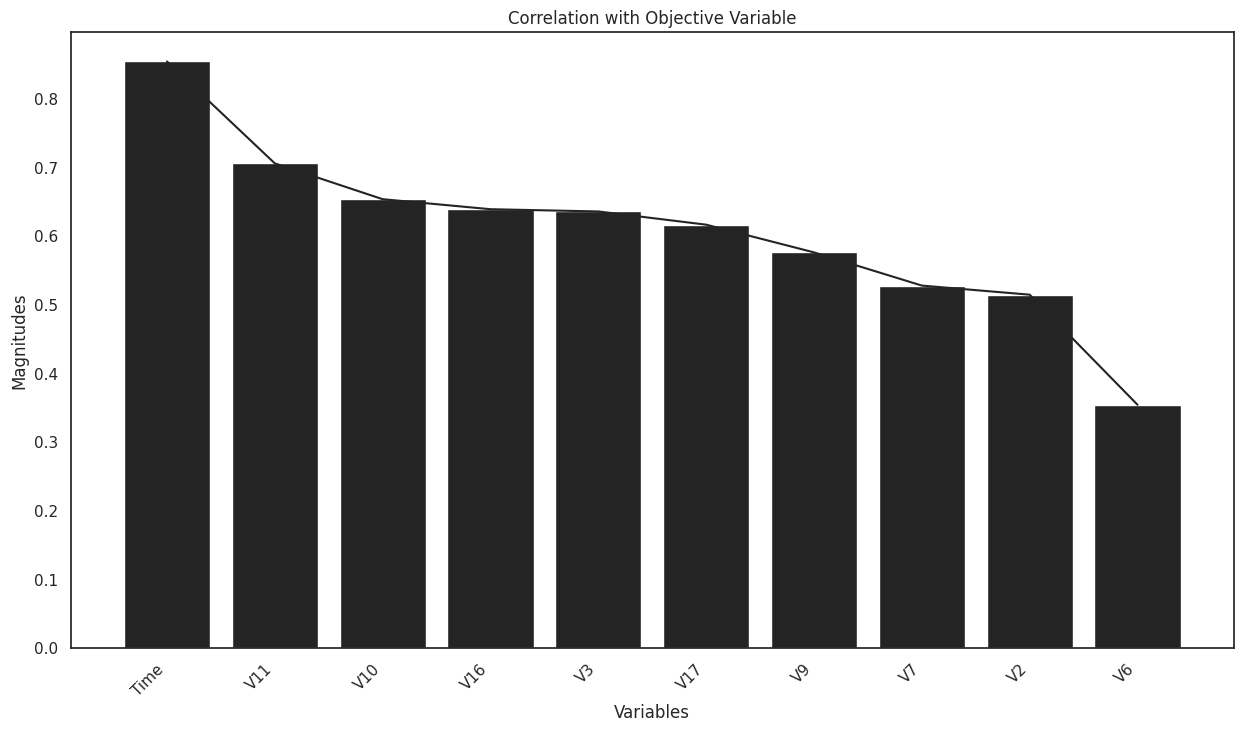

In [65]:
plt.figure(figsize=(15, 8))
plt.bar(df_corr.iloc[:10, 10].abs().sort_values(ascending=False).index, df_corr.iloc[:10, 10].abs().sort_values(ascending=False).values)
plt.plot(df_corr.iloc[:10, 10].abs().sort_values(ascending=False).index, df_corr.iloc[:10, 10].abs().sort_values(ascending=False).values)
plt.xlabel('Variables')
plt.ylabel('Magnitudes')
plt.title('Correlation with Objective Variable')
plt.xticks(rotation=45, ha='right')
plt.show

Se eliminan las variables con menor correlación con la variable objetivo.

La clase será predicha con las 6 variables que mejor la explican.

In [67]:
df_final = df_to_use.drop(columns=['V6','V2','V7','V9'])

df_final

,Time,V3,V10,V11,V16,V17,class
0,55618.0,-8.678550,-8.403150,5.705206,-7.303243,-12.448039,1.0
1,760.0,0.364303,0.805803,0.468352,1.224968,-1.194301,0.0
2,91524.0,-4.337200,-2.829098,3.504568,1.854772,6.024397,1.0
3,1117.0,0.125171,-1.319455,0.888864,-0.323648,-0.331106,0.0
4,1055.0,1.027702,-0.520121,-0.980264,0.419338,-0.017049,0.0
...,...,...,...,...,...,...,...
3015,1382.0,0.650583,-1.697437,0.014001,-1.348826,0.271070,0.0
3016,41147.0,-8.532522,-11.435624,7.674534,-12.391346,-22.541652,1.0
3017,742.0,-0.112405,-1.728971,-1.375718,-1.118987,-0.055501,0.0
3018,614.0,-0.071822,0.756011,-0.973257,-1.250635,-0.159661,0.0


Creo 2 dataframes, el primero para SVM y el segundo para el QSVM.

Escalo los datos entre 0 y 1 para el SVM, y entre 0 y 2*pi para el QSVM.

In [76]:
primera_columna = pd.DataFrame(df_final.iloc[:, -1])
primera_columna

,class
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
3015,0.0
3016,1.0
3017,0.0
3018,0.0


In [91]:
df_final.iloc[:, :-1]

,Time,V3,V10,V11,V16,V17
0,55618.0,-8.678550,-8.403150,5.705206,-7.303243,-12.448039
1,760.0,0.364303,0.805803,0.468352,1.224968,-1.194301
2,91524.0,-4.337200,-2.829098,3.504568,1.854772,6.024397
3,1117.0,0.125171,-1.319455,0.888864,-0.323648,-0.331106
4,1055.0,1.027702,-0.520121,-0.980264,0.419338,-0.017049
...,...,...,...,...,...,...
3015,1382.0,0.650583,-1.697437,0.014001,-1.348826,0.271070
3016,41147.0,-8.532522,-11.435624,7.674534,-12.391346,-22.541652
3017,742.0,-0.112405,-1.728971,-1.375718,-1.118987,-0.055501
3018,614.0,-0.071822,0.756011,-0.973257,-1.250635,-0.159661


In [93]:
# Extraer la columna con la clase binaria
binary_column = pd.DataFrame(df_final.iloc[:, -1])

# Escalar los datos en el rango [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_final.iloc[:, :-1])

# Escalar los datos en el rango [0, 2*pi]
scaler2 = MinMaxScaler(feature_range=(0, 2*np.pi))
scaled_data2 = scaler.fit_transform(df_final.iloc[:, :-1])


# Crear nuevo DataFrame con datos escalados y la columna binaria sin cambios
datos_CC = pd.DataFrame(scaled_data, columns=df_final.columns[:-1])
datos_CC.insert(0, df_final.columns[-1], binary_column)
datos_CC = datos_CC.dropna()

datos_QC = pd.DataFrame(scaled_data2, columns=df_final.columns[:-1])
datos_QC.insert(0, df_final.columns[-1], binary_column)
datos_QC = datos_QC.dropna()

# SVM clásico

Divido los datos en las categorías entrenamiento, validación y test.

In [94]:
X_aux, X_test, y_aux, y_test = train_test_split(
    datos_CC.iloc[:,1:], datos_CC.iloc[:,0], test_size=0.15, shuffle=True)
X_aux.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_aux.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_aux, y_aux, test_size=0.2, shuffle=True)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [95]:
m = SVC(kernel = 'rbf', gamma=0.01, C=10)

In [96]:
m.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

Predicciones con el conjunto de validación para poder reajustar los parámetros.

In [100]:
predicciones = m.predict(X_val)

# Se evalúa el modelo utilizando métricas como la precisión (accuracy) y un informe de clasificación
precision = accuracy_score(y_val, predicciones)
inf_classification = classification_report(y_val, predicciones)

print("Model Accuracy:", precision)
print("\nInformation of the Classification:\n", inf_classification)

Model Accuracy: 0.9863813229571985

Information of the Classification:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       320
         1.0       1.00      0.96      0.98       194

    accuracy                           0.99       514
   macro avg       0.99      0.98      0.99       514
weighted avg       0.99      0.99      0.99       514



Una vez elegido el mejor Kernel y los mejores parámetros, se prueba con los datos de test.

In [99]:
predicciones = m.predict(X_test)

# Se evalúa el modelo utilizando métricas como la precisión (accuracy) y un informe de clasificación
precision = accuracy_score(y_test, predicciones)
inf_classification = classification_report(y_test, predicciones)

print("Model Accuracy:", precision)
print("\nInformation of the Classification:\n", inf_classification)

Model Accuracy: 0.9845474613686535

Information of the Classification:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       272
         1.0       1.00      0.96      0.98       181

    accuracy                           0.98       453
   macro avg       0.99      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453



Obtengo una precisión del modelo muy alta, tanto a la hora de la validación como a la hora de utilizar los datos de test.

# QSVM

Nuevamente, divido los datos en las categorías entrenamiento, validación y test.

In [101]:
X_aux, X_test, y_aux, y_test = train_test_split(
    datos_QC.iloc[:,1:], datos_QC.iloc[:,0], test_size=0.15, shuffle=True)
X_aux.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_aux.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_aux, y_aux, test_size=0.2, shuffle=True)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Hago el 'Feature map' y el 'kernel'.

In [102]:
f,c = X_train.shape
feature_map = ZZFeatureMap(feature_dimension=c, reps=2, entanglement="linear")
kernel = FidelityQuantumKernel(feature_map=feature_map)

In [103]:
m2 = SVC(kernel = kernel.evaluate)

In [104]:
m2.fit(X_train, y_train)

KeyboardInterrupt: ignored

Se realizan predicciones en el conjunto de validación para ajustar parámetros.

In [ ]:
predicciones2 = m2.predict(X_val)

# Se evalúa el modelo utilizando métricas como la precisión (accuracy) y un informe de clasificación
precision2 = accuracy_score(y_val, predicciones2)
informe_clasificacion2 = classification_report(y_val, predicciones2)

print("Precisión del modelo:", precision2)
print("\nInforme de Clasificación:\n", informe_clasificacion2)

Precisión del modelo: 0.7380952380952381

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        62
         1.0       0.00      0.00      0.00        22

    accuracy                           0.74        84
   macro avg       0.37      0.50      0.42        84
weighted avg       0.54      0.74      0.63        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Una vez elegido el mejor Kernel y los mejores parámetros, se prueba con los datos de test.

In [ ]:
predicciones2 = m2.predict(X_test)

# Se evalúa el modelo utilizando métricas como la precisión (accuracy) y un informe de clasificación
precision2 = accuracy_score(y_test, predicciones2)
informe_clasificacion2 = classification_report(y_test, predicciones2)

print("Precisión del modelo:", precision2)
print("\nInforme de Clasificación:\n", informe_clasificacion2)

Precisión del modelo: 0.8108108108108109

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        60
         1.0       0.00      0.00      0.00        14

    accuracy                           0.81        74
   macro avg       0.41      0.50      0.45        74
weighted avg       0.66      0.81      0.73        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se exportan los 2 modelos.

In [ ]:
import joblib
joblib.dump(m, 'mCC.pkl')
joblib.dump(m2, 'mQC.pkl')

['mQC.pkl']

Se puede observar con los datos de test que los modelos tienen un error porcentual similar, siendo ligeramente mejor el cuántico, al entrenar los 2 con el mismo número de datos.

Sin embargo, hay que tener en cuenta que por las limitaciones computacionales cuánticas actuales, solo se han podido entrenar los modelos con casi 500 registros, ya que aparecían errores al aumentar esta cifra y ni siquiera llegaba a entrenarse. Por otro lado, el modelo clásico podría haberse entrenado con muchísimos registros más, superando así probablemente la precisión del modelo cuántico.

Se confirma que los modelos cuánticos actualmente pueden ser muy útiles si disponemos de una población pequeña de entrenamiento, pero por lo menos de momento, si este no es el caso, puede ser mejor opción un modelo clásico.

A continuación, se muestran las matrices de confusión.Así, comprobaremos si los modelos debido a su distinta naturaleza se equivocan de forma distinta a pesar de tener un margen de precisión similar. Si esto ocurriese, se podrían ensamblar los 2 modelos para obtener uno con mayor precisión.

In [ ]:
# Calcular las matrices de confusión
matriz_confusionCC = confusion_matrix(y_test, predicciones)
matriz_confusionQC = confusion_matrix(y_test, predicciones2)

# Se convierten en dataframes
df_confusionCC = pd.DataFrame(matriz_confusionCC, index=['Real negativos', 'Real positivos'], columns=['Predicción negativos', 'Predicción positivos'])
df_confusionQC = pd.DataFrame(matriz_confusionQC, index=['Real negativos', 'Real positivos'], columns=['Predicción negativos', 'Predicción positivos'])

In [ ]:
df_confusionCC.head()

,Predicción positivos,Predicción negativos
Real positivos,60,0
Real negativos,14,0


In [ ]:
df_confusionQC.head()

,Predicción positivos,Predicción negativos
Real positivos,60,0
Real negativos,14,0


Se observa que en ambos casos todos los negativos reales se han clasificado bien, lo contario que los positivos reales. Esto, se podría corregir introduciendo más datos al entrenamiento, lo cual solo sería posible con el SVM clásico actualmente.

Por este motivo, parece que para este dataset concreto es mejor quedarse con el modelo clásico y entrenarlo con más registros.

Se realiza la comprobación de esto a continuación.

# SVM con todos los datos (clásico)

In [ ]:
datosraw = pd.read_csv("diabetes.csv", encoding='latin-1', sep=',')
datosraw = datosraw.drop(columns=['CholCheck','NoDocbcCost','MentHlth','DiffWalk','Sex','Education','Income','AnyHealthcare','Smoker','HvyAlcoholConsump','PhysActivity','PhysHlth','HighChol','Fruits'])

,Diabetes_binary,HighBP,BMI,Stroke,HeartDiseaseorAttack,Veggies,GenHlth,Age
0,0.0,1.0,40.0,0.0,0.0,1.0,5.0,9.0
1,0.0,0.0,25.0,0.0,0.0,0.0,3.0,7.0
2,0.0,1.0,28.0,0.0,0.0,0.0,5.0,9.0
3,0.0,1.0,27.0,0.0,0.0,1.0,2.0,11.0
4,0.0,1.0,24.0,0.0,0.0,1.0,2.0,11.0


In [ ]:
# Extraer la primera columna
primera_columna = pd.DataFrame(datosraw.iloc[:, 0])

# Escalar los datos en el rango [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
datos_escalados = scaler.fit_transform(datosraw.iloc[:, 1:])

# Crear un nuevo DataFrame con los datos escalados y la primera columna sin cambios
datos_CC = pd.DataFrame(datos_escalados, columns=datosraw.columns[1:])
datos_CC.insert(0, datosraw.columns[0], primera_columna)
datos_CC = datos_CC.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    datos_CC.iloc[:,1:], datos_CC.iloc[:,0], test_size=0.15, shuffle=True)
X_aux.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_aux.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
m = SVC(kernel = 'rbf', gamma=0.01, C=10)

In [ ]:
m.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [ ]:
f,c = X_train.shape
print(f'El modelo se ha entrenado con {f} registros')
f,c = X_test.shape
print(f'\nSe realiza un test con {f} registros')

El modelo se ha entrenado con 215628 registros

Se realiza un test con 38052 registros


In [ ]:
predicciones = m.predict(X_test)

# Se evalúa el modelo utilizando métricas como la precisión (accuracy) y un informe de clasificación
precision = accuracy_score(y_test, predicciones)
informe_clasificacion = classification_report(y_test, predicciones)

print("Precisión del modelo:", precision)
print("\nInforme de Clasificación:\n", informe_clasificacion)

Precisión del modelo: 0.8605329549038159

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     32745
         1.0       0.00      0.00      0.00      5307

    accuracy                           0.86     38052
   macro avg       0.43      0.50      0.46     38052
weighted avg       0.74      0.86      0.80     38052



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calcular las matriz de confusión
matriz_confusionCC = confusion_matrix(y_test, predicciones)

# Se convierte en dataframe
df_confusionCC = pd.DataFrame(matriz_confusionCC, index=['Real negativos', 'Real positivos'], columns=['Predicción negativos', 'Predicción positivos'])

In [ ]:
df_confusionCC.head()

,Predicción positivos,Predicción negativos
Real positivos,32745,0
Real negativos,5307,0


In [ ]:
joblib.dump(m, 'mCC_final.pkl')

['mCC_final.pkl']

Aunque aumenta la precisión, también se observa un problema con el dataset que es que hay muchos más negativos que positivos, y no era problema de la separación aleatoria previa de registros. Esto, hace que se realicen mejores pronósticos con esta clase, aunque existan muchos falsos negativos. Habría que balancear el dataset para poder hacer un modelo más completo.

In [ ]:
# Contar los valores en la columna binaria
conteo_valores = datosraw['Diabetes_binary'].value_counts()

# Imprimir el conteo de valores
print(conteo_valores)

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64


Seguramente, esta siituación se de ya que hay muchas más personas que no padecen diabetes comparado con las que sí.

Se prueba un último modelo que da diferente peso a las clases

# Modelo balanceados

In [ ]:
from sklearn.utils import class_weight

# Calcula los pesos de clase para manejar clases desequilibradas
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Crea un clasificador SVM con kernel RBF y parámetros gamma=0.01 y C=10, y los pesos de clase
m = SVC(kernel='rbf', gamma=0.01, C=10, class_weight=dict(enumerate(class_weights)))

# Entrena el modelo con los datos de entrenamiento
m.fit(X_train, y_train)

SVC(C=10, class_weight={0: 0.5809288266007144, 1: 3.5891341256366722},
    gamma=0.01)

In [ ]:
predicciones = m.predict(X_test)

# Se evalúa el modelo utilizando métricas como la precisión (accuracy) y un informe de clasificación
precision = accuracy_score(y_test, predicciones)
informe_clasificacion = classification_report(y_test, predicciones)

print("Precisión del modelo:", precision)
print("\nInforme de Clasificación:\n", informe_clasificacion)

Precisión del modelo: 0.6780195521917376

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     32745
         1.0       0.28      0.81      0.41      5307

    accuracy                           0.68     38052
   macro avg       0.62      0.74      0.60     38052
weighted avg       0.86      0.68      0.73     38052



In [ ]:
# Calcular las matriz de confusión
matriz_confusionCC = confusion_matrix(y_test, predicciones)

# Se convierte en dataframe
df_confusionCC = pd.DataFrame(matriz_confusionCC, index=['Real negativos', 'Real positivos'], columns=['Predicción negativos', 'Predicción positivos'])

In [ ]:
df_confusionCC.head()

,Predicción negativos,Predicción positivos
Real negativos,21476,11269
Real positivos,983,4324


In [ ]:
joblib.dump(m, 'mCC_balanceado.pkl')

['mCC_balanceado.pkl']

Ahora disminuye la precisión pero el error es más parecido entre las 2 clases.